# ЛАБОРАТОРНАЯ РАБОТА №1
### Разведочный и регрессионный анализ данных на основе нейросетевых моделей
Вариант 6

In [3]:
# Load libraries.
import pandas as pd
import numpy as np

from pandas import set_option

set_option('display.precision', 3) # Устанавливаем точность отображения чисел до 3 знаков после запятой.

### Загрузка csv файла

In [4]:
DATA_FILE = "./V5.csv"

df = pd.read_csv(DATA_FILE) # Загружаем данные из CSV файла в DataFrame

# Drop "motor_UPDRS".
df = df.drop(columns=["motor_UPDRS", "index", "Unnamed: 0"]) # Удаляем столбцы "motor_UPDRS", "index" и "Unnamed: 0" из DataFrame.

### Ознакомление с данными.

In [5]:
df.head()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.643,34.398,0.007,3.380e-05,4.010e-03,0.003,0.012,...,0.230,0.014,0.013,0.017,0.043,0.014,21.640,0.419,0.548,0.160
1,1,72,0,12.666,34.894,0.003,1.680e-05,1.320e-03,0.002,0.004,...,0.179,0.010,0.011,0.017,0.030,0.011,27.183,0.435,0.565,0.108
2,1,72,0,19.681,35.389,0.005,NaN,2.050e-03,0.002,0.006,...,0.181,0.007,0.008,0.015,0.022,0.020,23.047,0.462,0.544,0.210
3,1,72,0,25.647,35.810,0.005,NaN,1.910e-03,0.003,0.006,...,0.327,0.011,0.013,0.020,0.033,0.028,24.445,0.487,0.578,0.333
4,1,72,0,33.642,36.375,0.003,2.014e-05,9.300e-04,0.001,0.003,...,0.176,0.007,0.009,0.018,0.020,0.012,26.126,0.472,0.561,0.194


В наборе данных 21 столбец. total_UPDRS - целевой признак, содержащий информацию о болезни Паркинсона у субъекта. 

Остальные признаки - медицинские показатели, характеризующие наличие у пациента тремора и других признаков болезни Паркинсона. Кроме того, в наборе присутствуют возраст, пол и продолжительность обследования.

In [6]:
df.info() # Информация о DataFrame: количество записей, типы данных и количество ненулевых значений в каждом столбце.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   total_UPDRS    5875 non-null   float64
 5   Jitter(%)      5875 non-null   float64
 6   Jitter(Abs)    2944 non-null   float64
 7   Jitter:RAP     5875 non-null   float64
 8   Jitter:PPQ5    5875 non-null   float64
 9   Jitter:DDP     5875 non-null   float64
 10  Shimmer        5875 non-null   float64
 11  Shimmer(dB)    5875 non-null   float64
 12  Shimmer:APQ3   5875 non-null   float64
 13  Shimmer:APQ5   5875 non-null   float64
 14  Shimmer:APQ11  5875 non-null   float64
 15  Shimmer:DDA    5875 non-null   float64
 16  NHR            5875 non-null   float64
 17  HNR            5875 non-null   float64
 18  RPDE    

В наборе данных есть пропуски для столбцов Jitter(Abs) и Jitter(PPQ5). Данные числовые.

In [8]:
df.describe() # Описательная статистика для числовых столбцов (среднее, стандартное отклонение, минимум, максимум и т.д)

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000,5875.000,5875.000,5875.000,5875.000,5.875e+03,2.944e+03,5.875e+03,5.875e+03,5.875e+03,...,5875.000,5875.000,5875.000,5875.000,5875.000,5.875e+03,5875.000,5875.000,5875.000,5875.000
mean,21.494,64.805,0.318,92.864,29.019,6.154e-03,4.409e-05,2.987e-03,3.277e-03,8.962e-03,...,0.311,0.017,0.020,0.027,0.051,3.212e-02,21.679,0.541,0.653,0.220
std,12.372,8.822,0.466,53.446,10.700,5.624e-03,3.552e-05,3.124e-03,3.732e-03,9.371e-03,...,0.230,0.013,0.017,0.020,0.040,5.969e-02,4.291,0.101,0.071,0.091
min,1.000,36.000,0.000,-4.263,7.000,8.300e-04,2.250e-06,3.300e-04,4.300e-04,9.800e-04,...,0.026,0.002,0.002,0.002,0.005,2.860e-04,1.659,0.151,0.514,0.022
25%,10.000,58.000,0.000,46.847,21.371,3.580e-03,2.296e-05,1.580e-03,1.820e-03,4.730e-03,...,0.175,0.009,0.011,0.016,0.028,1.095e-02,19.406,0.470,0.596,0.156
50%,22.000,65.000,0.000,91.523,27.576,4.900e-03,3.458e-05,2.250e-03,2.490e-03,6.750e-03,...,0.253,0.014,0.016,0.023,0.041,1.845e-02,21.920,0.542,0.644,0.205
75%,33.000,72.000,1.000,138.445,36.399,6.800e-03,5.323e-05,3.290e-03,3.460e-03,9.870e-03,...,0.365,0.021,0.024,0.033,0.062,3.146e-02,24.444,0.614,0.711,0.264
max,42.000,85.000,1.000,215.490,54.992,9.999e-02,3.957e-04,5.754e-02,6.956e-02,1.726e-01,...,2.107,0.163,0.167,0.275,0.488,7.483e-01,37.875,0.966,0.866,0.732


Здесь видно, что данные в наборе имеют разный масштаб.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
df["total_UPDRS"].hist(bins=50, figsize=(3,3)) # Строим гистограмму распределения значений в столбце motor_UPDRS, используя 50 интервалов (bins) и устанавливая размер графика 3x3 дюйма.

<Axes: >

Распределение целевого признака - нормальное.

In [12]:
df.sex.hist(bins=2, figsize=(2,2))

<Axes: >

Полы распределены неравномерно

<Axes: >

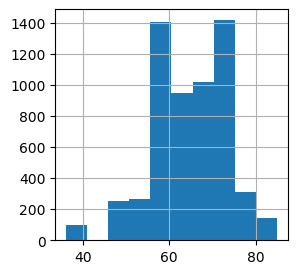

In [10]:
df.age.hist(bins=10, figsize=(3,3))

Распределение возрастов нормальное

array([[<Axes: title={'center': 'Jitter(%)'}>,
        <Axes: title={'center': 'Jitter(Abs)'}>,
        <Axes: title={'center': 'Jitter:RAP'}>,
        <Axes: title={'center': 'Jitter:PPQ5'}>],
       [<Axes: title={'center': 'Jitter:DDP'}>,
        <Axes: title={'center': 'Shimmer'}>,
        <Axes: title={'center': 'Shimmer(dB)'}>,
        <Axes: title={'center': 'Shimmer:APQ3'}>],
       [<Axes: title={'center': 'Shimmer:APQ5'}>,
        <Axes: title={'center': 'Shimmer:APQ11'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>],
       [<Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>, <Axes: title={'center': 'PPE'}>]],
      dtype=object)

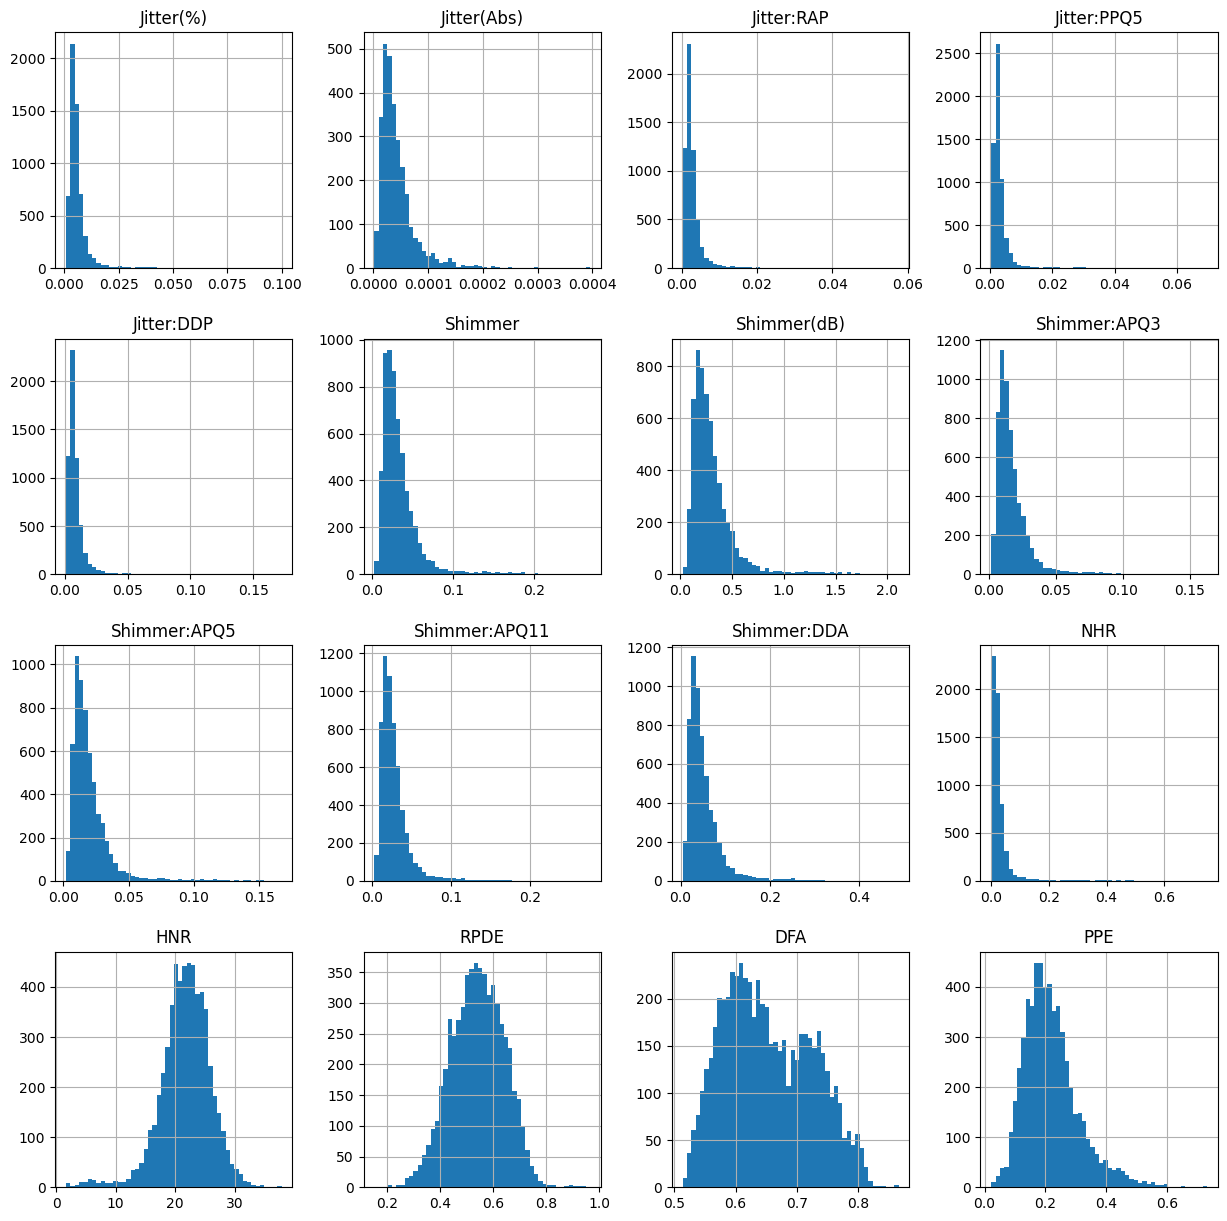

In [11]:
df.iloc[:, 5:21].hist(bins=50, figsize=(15,15))

Большая часть признаков имеет нормальное распределение и тяжелые хвосты справа.

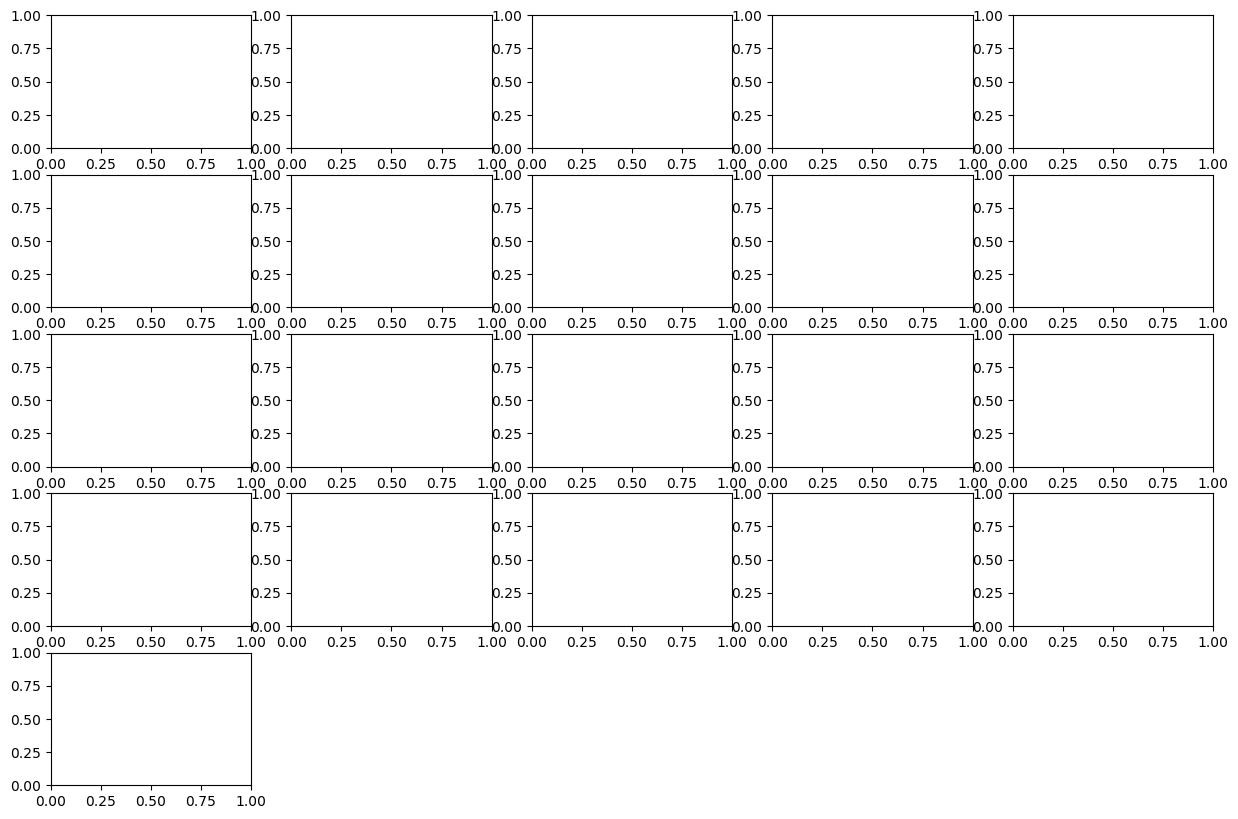

<class 'ModuleNotFoundError'>: No module named 'scipy'

In [12]:
df.plot(kind='density', layout=(5, 5), subplots=True, sharex=False, legend=True, figsize=(15,10))

По диаграммам плотности можно убедиться, что все признаки, кроме возраста, номера субъекта и пола распределены нормально.

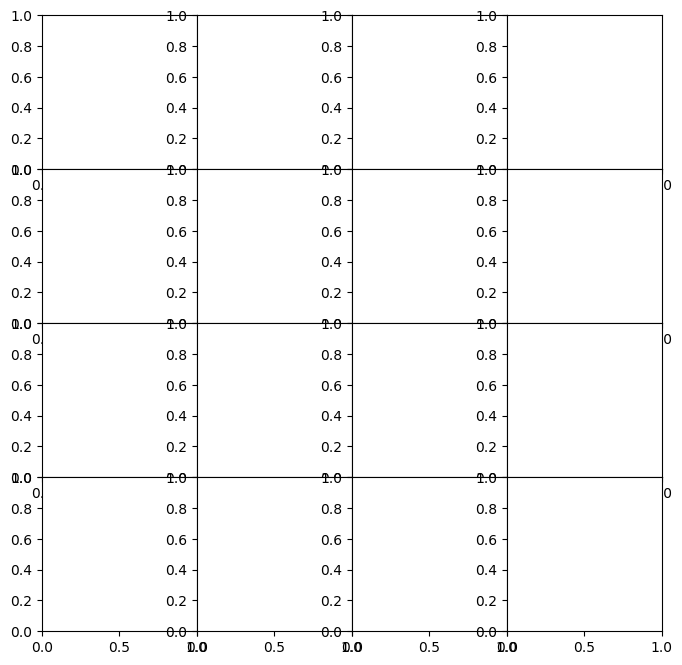

<class 'ModuleNotFoundError'>: No module named 'scipy'

In [13]:
pd.plotting.scatter_matrix(df.iloc[:, 5:9], figsize=(8, 8), diagonal='kde')

Из матриц рассевивания можно увидеть, что признаки типа Jitter коррелируют

array([[<Axes: xlabel='Shimmer', ylabel='Shimmer'>,
        <Axes: xlabel='Shimmer(dB)', ylabel='Shimmer'>,
        <Axes: xlabel='Shimmer:APQ3', ylabel='Shimmer'>,
        <Axes: xlabel='Shimmer:APQ5', ylabel='Shimmer'>,
        <Axes: xlabel='Shimmer:APQ11', ylabel='Shimmer'>],
       [<Axes: xlabel='Shimmer', ylabel='Shimmer(dB)'>,
        <Axes: xlabel='Shimmer(dB)', ylabel='Shimmer(dB)'>,
        <Axes: xlabel='Shimmer:APQ3', ylabel='Shimmer(dB)'>,
        <Axes: xlabel='Shimmer:APQ5', ylabel='Shimmer(dB)'>,
        <Axes: xlabel='Shimmer:APQ11', ylabel='Shimmer(dB)'>],
       [<Axes: xlabel='Shimmer', ylabel='Shimmer:APQ3'>,
        <Axes: xlabel='Shimmer(dB)', ylabel='Shimmer:APQ3'>,
        <Axes: xlabel='Shimmer:APQ3', ylabel='Shimmer:APQ3'>,
        <Axes: xlabel='Shimmer:APQ5', ylabel='Shimmer:APQ3'>,
        <Axes: xlabel='Shimmer:APQ11', ylabel='Shimmer:APQ3'>],
       [<Axes: xlabel='Shimmer', ylabel='Shimmer:APQ5'>,
        <Axes: xlabel='Shimmer(dB)', ylabel='Shimmer:AP

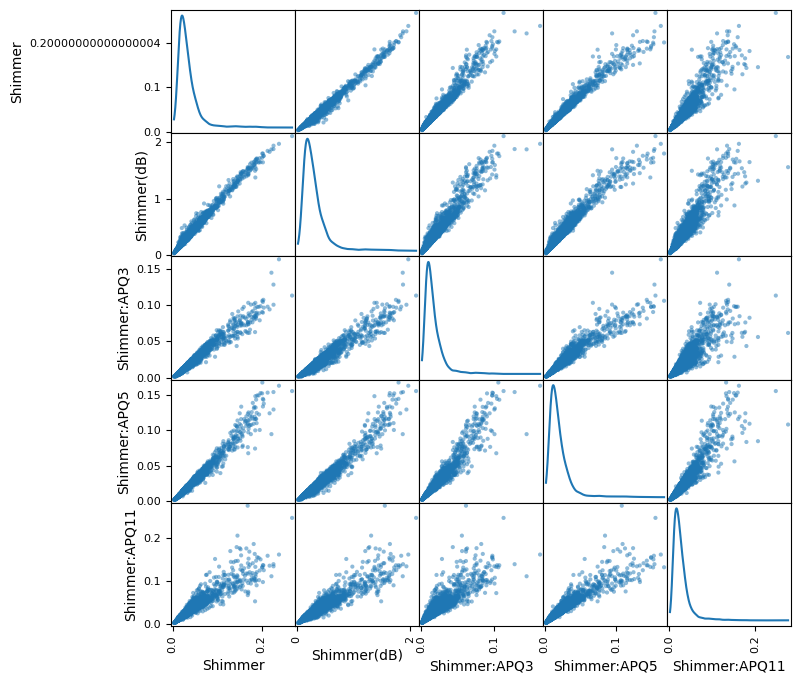

In [76]:
pd.plotting.scatter_matrix(df.iloc[:, 10:15], figsize=(8, 8), diagonal='kde')

То же самое для Shimmer.

array([[<Axes: xlabel='NHR', ylabel='NHR'>,
        <Axes: xlabel='HNR', ylabel='NHR'>,
        <Axes: xlabel='RPDE', ylabel='NHR'>,
        <Axes: xlabel='DFA', ylabel='NHR'>,
        <Axes: xlabel='PPE', ylabel='NHR'>],
       [<Axes: xlabel='NHR', ylabel='HNR'>,
        <Axes: xlabel='HNR', ylabel='HNR'>,
        <Axes: xlabel='RPDE', ylabel='HNR'>,
        <Axes: xlabel='DFA', ylabel='HNR'>,
        <Axes: xlabel='PPE', ylabel='HNR'>],
       [<Axes: xlabel='NHR', ylabel='RPDE'>,
        <Axes: xlabel='HNR', ylabel='RPDE'>,
        <Axes: xlabel='RPDE', ylabel='RPDE'>,
        <Axes: xlabel='DFA', ylabel='RPDE'>,
        <Axes: xlabel='PPE', ylabel='RPDE'>],
       [<Axes: xlabel='NHR', ylabel='DFA'>,
        <Axes: xlabel='HNR', ylabel='DFA'>,
        <Axes: xlabel='RPDE', ylabel='DFA'>,
        <Axes: xlabel='DFA', ylabel='DFA'>,
        <Axes: xlabel='PPE', ylabel='DFA'>],
       [<Axes: xlabel='NHR', ylabel='PPE'>,
        <Axes: xlabel='HNR', ylabel='PPE'>,
        <Axes: xlab

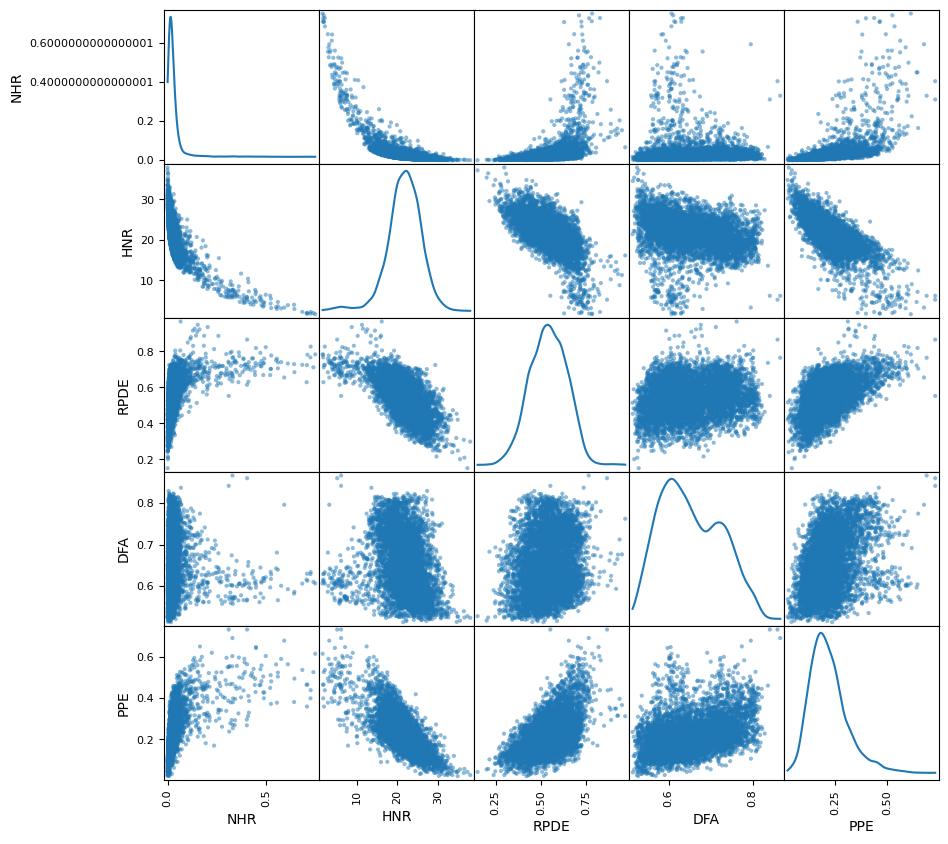

In [77]:
pd.plotting.scatter_matrix(df.iloc[:, 16:21], figsize=(10, 10), diagonal='kde')

Между признаками NHR и HNR наблюдается обратная зависимость. Между признакми NHR, PPE и PDRE можно установить нелинейную прямую зависимость.

Признак DFA коррелирует слабо с остальными признаками.

Итого, поскольку признаки типа Jitter сильно коррелируют между собой, в наборе данных можно оставить только один из них (для сокращения признакового пространства).

Аналогично можно оставить только один из признаков Shimmer.

Можно оставить только один признак из NHR, PPE, PDRE и HNR.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='test_time', ylabel='age'>,
        <Axes: xlabel='motor_UPDRS', ylabel='age'>,
        <Axes: xlabel='Jitter(%)', ylabel='age'>,
        <Axes: xlabel='Shimmer', ylabel='age'>,
        <Axes: xlabel='HNR', ylabel='age'>,
        <Axes: xlabel='DFA', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='test_time'>,
        <Axes: xlabel='test_time', ylabel='test_time'>,
        <Axes: xlabel='motor_UPDRS', ylabel='test_time'>,
        <Axes: xlabel='Jitter(%)', ylabel='test_time'>,
        <Axes: xlabel='Shimmer', ylabel='test_time'>,
        <Axes: xlabel='HNR', ylabel='test_time'>,
        <Axes: xlabel='DFA', ylabel='test_time'>],
       [<Axes: xlabel='age', ylabel='motor_UPDRS'>,
        <Axes: xlabel='test_time', ylabel='motor_UPDRS'>,
        <Axes: xlabel='motor_UPDRS', ylabel='motor_UPDRS'>,
        <Axes: xlabel='Jitter(%)', ylabel='motor_UPDRS'>,
        <Axes: xlabel='Shimmer', ylabel='motor_UPDRS'>,
        

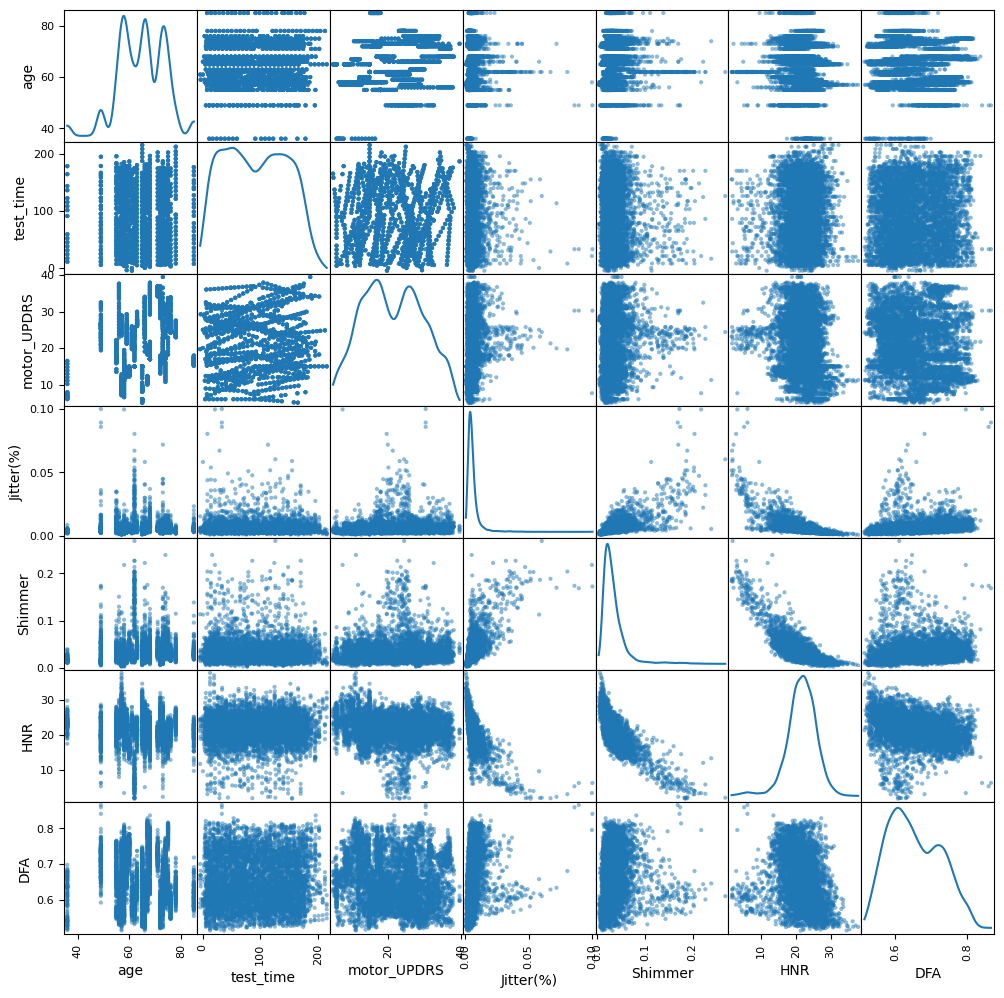

In [ ]:
pd.plotting.scatter_matrix(df.iloc[:, [1, 3, 4, 5, 10, 17, 19]], figsize=(12, 12), diagonal='kde') #kde - график плотности распределения Kernel Density Estimation (KDE)

Из общей матрицы рассеивания видно, что Jitter, Shimmer, HNR коррелируют друг с другом. 

Для целевого признака корреляция не наблюдается ни с одним из других признаков.

In [14]:
corr_matrix = df.iloc[:, 1:].corr() # Вычисляем корреляционную матрицу для всех столбцов DataFrame. Метод corr() рассчитывает коэффициенты корреляции Пирсона между всеми парами признаков.
corr_matrix

,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
age,1.000,-4.160e-02,1.988e-02,0.310,0.023,1.272e-02,0.010,0.013,0.010,0.102,0.111,0.099,0.090,0.135,0.099,0.007,-1.048e-01,0.090,-0.093,1.208e-01
sex,-0.042,1.000e+00,-9.805e-03,-0.097,0.051,-1.593e-01,0.077,0.088,0.077,0.059,0.056,0.045,0.065,0.023,0.045,0.168,-1.671e-04,-0.159,-0.165,-9.990e-02
test_time,0.020,-9.805e-03,1.000e+00,0.075,-0.023,5.222e-04,-0.029,-0.023,-0.029,-0.034,-0.031,-0.029,-0.037,-0.039,-0.029,-0.026,3.654e-02,-0.039,0.019,-5.634e-04
total_UPDRS,0.310,-9.656e-02,7.526e-02,1.000,0.074,5.407e-02,0.064,0.063,0.064,0.092,0.099,0.079,0.083,0.121,0.079,0.061,-1.621e-01,0.157,-0.113,1.562e-01
Jitter(%),0.023,5.142e-02,-2.284e-02,0.074,1.000,8.597e-01,0.984,0.968,0.984,0.710,0.717,0.664,0.694,0.646,0.664,0.825,-6.752e-01,0.427,0.227,7.218e-01
Jitter(Abs),0.013,-1.593e-01,5.222e-04,0.054,0.860,1.000e+00,0.843,0.803,0.843,0.648,0.655,0.631,0.625,0.595,0.631,0.692,-7.072e-01,0.542,0.351,7.879e-01
Jitter:RAP,0.010,7.672e-02,-2.889e-02,0.064,0.984,8.434e-01,1.000,0.947,1.000,0.682,0.686,0.650,0.660,0.603,0.650,0.792,-6.415e-01,0.383,0.215,6.707e-01
Jitter:PPQ5,0.013,8.799e-02,-2.329e-02,0.063,0.968,8.029e-01,0.947,1.000,0.947,0.733,0.735,0.677,0.734,0.668,0.677,0.865,-6.624e-01,0.382,0.175,6.635e-01
Jitter:DDP,0.010,7.670e-02,-2.888e-02,0.064,0.984,8.434e-01,1.000,0.947,1.000,0.682,0.686,0.650,0.660,0.603,0.650,0.792,-6.415e-01,0.383,0.215,6.707e-01
Shimmer,0.102,5.874e-02,-3.387e-02,0.092,0.710,6.482e-01,0.682,0.733,0.682,1.000,0.992,0.980,0.985,0.935,0.980,0.795,-8.014e-01,0.468,0.133,6.157e-01


## Подготовка данных

### Работа с недостающими данными
В двух признаках наблюдаются пропущенные значения. Ранее было установлено, что эти признаки (Jitter(Abs) и Jitter:PPQ5) коррелируют с остальными показателями Jitter, т.к. они являются разными способами измерения одного и того же явления.

Поэтому данные признаки можно убрать из набора данных без потери его информативности.

In [15]:
df_initial = df.drop(["Jitter(Abs)", "Jitter:PPQ5"], axis=1)
df_prepared = df_initial
df_prepared

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter:RAP,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.643,34.398,0.007,4.010e-03,0.012,0.026,0.230,0.014,0.013,0.017,0.043,0.014,21.640,0.419,0.548,0.160
1,1,72,0,12.666,34.894,0.003,1.320e-03,0.004,0.020,0.179,0.010,0.011,0.017,0.030,0.011,27.183,0.435,0.565,0.108
2,1,72,0,19.681,35.389,0.005,2.050e-03,0.006,0.017,0.181,0.007,0.008,0.015,0.022,0.020,23.047,0.462,0.544,0.210
3,1,72,0,25.647,35.810,0.005,1.910e-03,0.006,0.023,0.327,0.011,0.013,0.020,0.033,0.028,24.445,0.487,0.578,0.333
4,1,72,0,33.642,36.375,0.003,9.300e-04,0.003,0.017,0.176,0.007,0.009,0.018,0.020,0.012,26.126,0.472,0.561,0.194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.790,33.485,0.004,1.670e-03,0.005,0.019,0.160,0.010,0.011,0.015,0.029,0.025,22.369,0.642,0.553,0.214
5871,42,61,0,149.840,32.988,0.003,1.190e-03,0.004,0.023,0.215,0.011,0.013,0.019,0.032,0.012,22.886,0.526,0.565,0.126
5872,42,61,0,156.820,32.495,0.003,1.520e-03,0.005,0.025,0.244,0.014,0.015,0.019,0.041,0.018,25.065,0.478,0.579,0.142
5873,42,61,0,163.730,32.007,0.003,1.280e-03,0.004,0.015,0.131,0.007,0.009,0.013,0.021,0.008,24.422,0.569,0.563,0.142


### Анализ признаков

In [17]:
from sklearn.feature_selection import SelectKBest, f_regression

data_X = df_prepared.iloc[:, list(range(0, 4)) + list(range(5, 19))]
data_Y = df_prepared["total_UPDRS"] # Выбираем столбец "motor_UPDRS" как целевую переменную, которую мы хотим предсказывать

best_features = SelectKBest(f_regression, k=5) # Создаем объект SelectKBest с функцией оценки f_regression, который выберет 5 лучших признаков по их статистической значимости для регрессионной задачи.
fit = best_features.fit(data_X, data_Y) # Оценка значимости каждого признака в data_X относительно data_Y. После этого объект best_features содержит информацию о F-значениях для всех признаков.
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(data_X.columns)

feature_scores = pd.concat([df_columns, df_scores], axis=1) # Итоговая таблица, в которой каждому признаку соответствует его F-значение.
feature_scores

,0,0
0,subject#,403.817
1,age,625.693
2,sex,55.273
3,test_time,33.457
4,Jitter(%),32.555
5,Jitter:RAP,24.166
6,Jitter:DDP,24.176
7,Shimmer,50.288
8,Shimmer(dB),57.882
9,Shimmer:APQ3,37.225


На основании анализа лучших признаков, можно сделать следующие выводы:
- subject имеет высокий показатель важности, но он не подходит по смыслу, т.к. на основании номера пациента нельзя предсказать у него какой-либо медицинский показатель. Поэтому данный признак следует убрать
- age имеет высокий показатель важности и его следует оставить в наборе
- sex, test_time Jitter(%), Jitter:RAP и Jitter:DDP можно убрать ввиду их слабой информативности
- можно оставить Shimmer:APQ11, остальные Shimmer следует убрать, т.к. они коррелируют с этим "лучшим" признаком
- поскольку NHR, RPDE, PPE коррелируют, можно оставить лучший из них - PPE
- HNR и DFA можно оставить.

In [18]:
df_prepared = df_prepared.drop(["subject#", "sex", "test_time", "Jitter(%)", "Jitter:RAP", "Jitter:DDP", "Shimmer", "Shimmer(dB)", "Shimmer:DDA", "Shimmer:APQ3", "Shimmer:APQ5", "NHR", "RPDE"], axis=1)
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   total_UPDRS    5875 non-null   float64
 2   Shimmer:APQ11  5875 non-null   float64
 3   HNR            5875 non-null   float64
 4   DFA            5875 non-null   float64
 5   PPE            5875 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 275.5 KB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'total_UPDRS'}>],
       [<Axes: title={'center': 'Shimmer:APQ11'}>,
        <Axes: title={'center': 'HNR'}>],
       [<Axes: title={'center': 'DFA'}>, <Axes: title={'center': 'PPE'}>]],
      dtype=object)

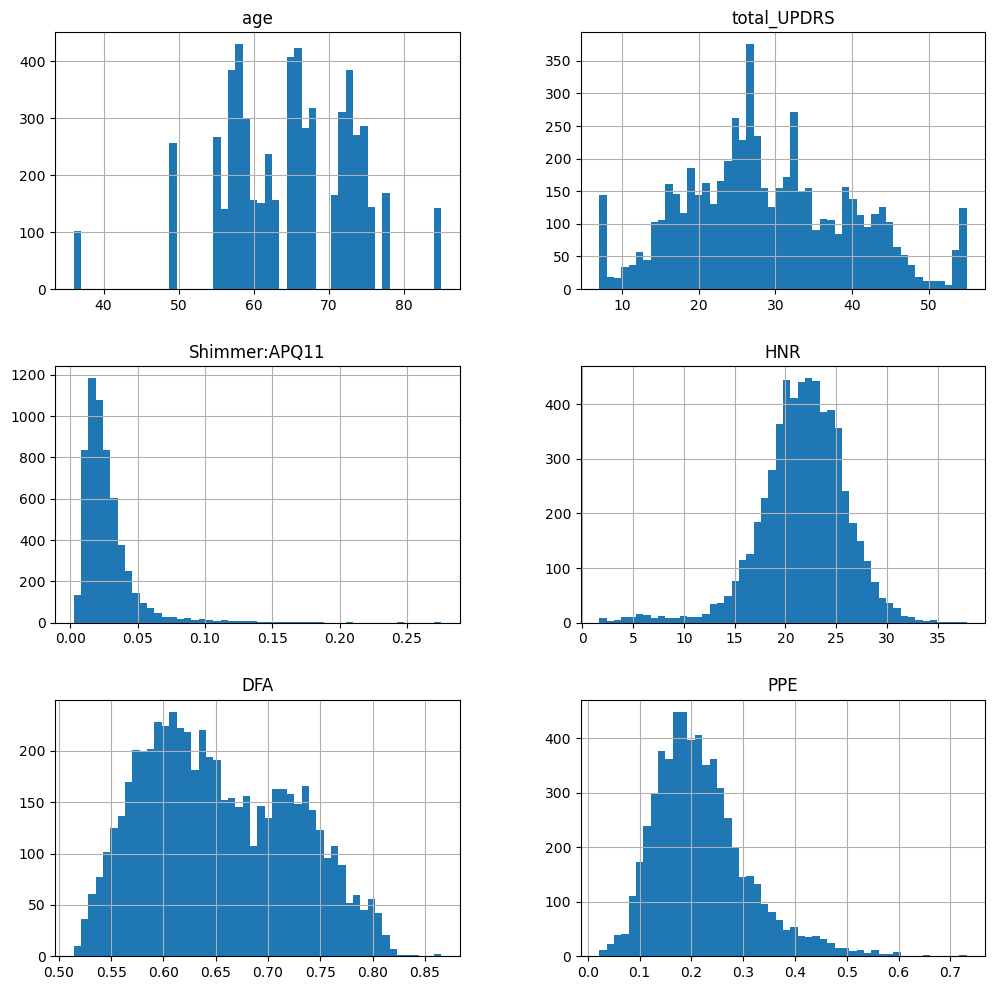

In [19]:
df_prepared.hist(bins=50, figsize=(12,12))

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='total_UPDRS', ylabel='age'>,
        <Axes: xlabel='Shimmer:APQ11', ylabel='age'>,
        <Axes: xlabel='HNR', ylabel='age'>,
        <Axes: xlabel='DFA', ylabel='age'>,
        <Axes: xlabel='PPE', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='total_UPDRS'>,
        <Axes: xlabel='total_UPDRS', ylabel='total_UPDRS'>,
        <Axes: xlabel='Shimmer:APQ11', ylabel='total_UPDRS'>,
        <Axes: xlabel='HNR', ylabel='total_UPDRS'>,
        <Axes: xlabel='DFA', ylabel='total_UPDRS'>,
        <Axes: xlabel='PPE', ylabel='total_UPDRS'>],
       [<Axes: xlabel='age', ylabel='Shimmer:APQ11'>,
        <Axes: xlabel='total_UPDRS', ylabel='Shimmer:APQ11'>,
        <Axes: xlabel='Shimmer:APQ11', ylabel='Shimmer:APQ11'>,
        <Axes: xlabel='HNR', ylabel='Shimmer:APQ11'>,
        <Axes: xlabel='DFA', ylabel='Shimmer:APQ11'>,
        <Axes: xlabel='PPE', ylabel='Shimmer:APQ11'>],
       [<Axes: xlabel='age', ylabel='HNR'>,

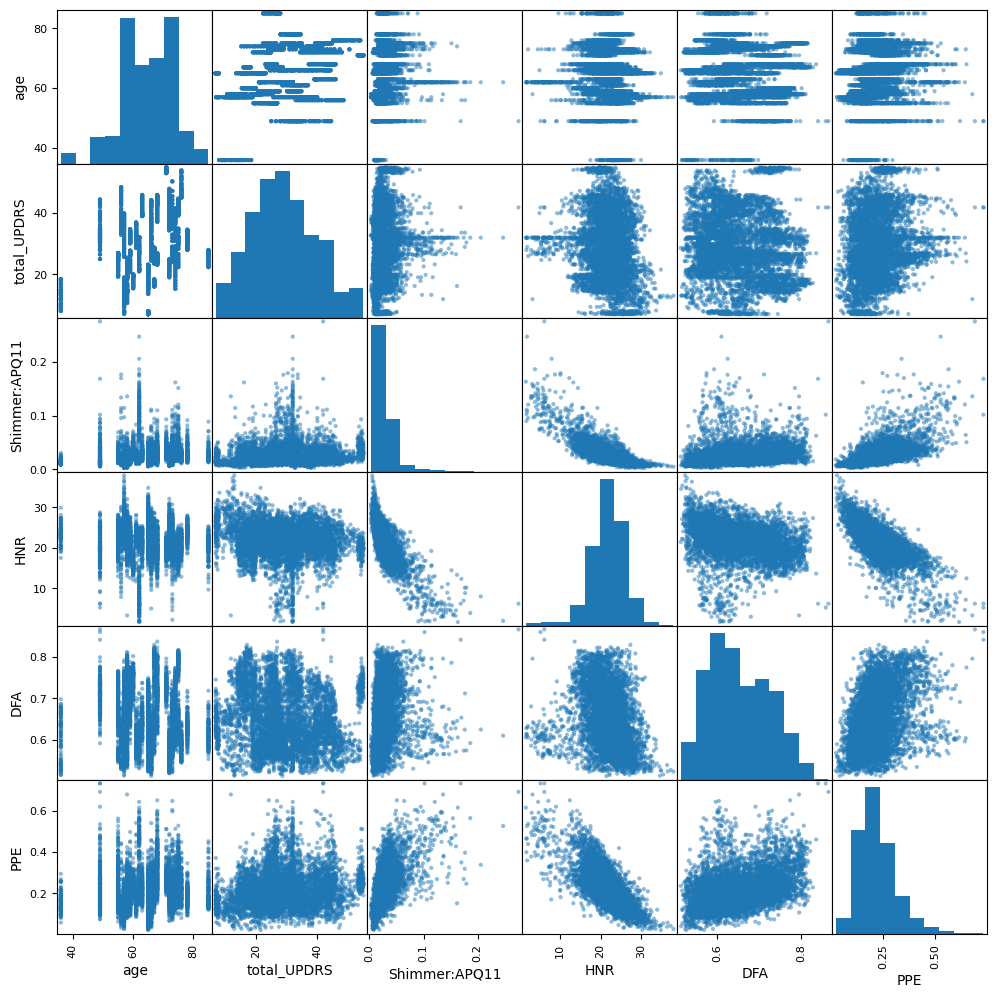

In [21]:
pd.plotting.scatter_matrix(df_prepared, figsize=(12, 12))

### Min-max масштабирование

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # преобразование данных в диапазон [0, 1]

# вычисляем минимальное и максимальное значение для каждого признака в df_initial -> преобразуем данные df_initial, переводя их в диапазон [0, 1] 
df_initial_transformed =\
    pd.DataFrame(scaler.fit(df_initial).fit_transform(df_initial), columns=df_initial.columns)
df_prepared_transformed =\
    pd.DataFrame(scaler.fit(df_prepared).fit_transform(df_prepared), columns=df_prepared.columns)

# масштабированные исходные данных
df_initial_transformed.head()

,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter:RAP,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0.0,0.735,0.0,0.045,0.672,0.058,0.064,0.064,0.085,0.098,0.079,0.068,0.052,0.079,0.019,0.552,0.329,0.098,0.195
1,0.0,0.735,0.0,0.077,0.679,0.022,0.017,0.017,0.065,0.074,0.052,0.053,0.053,0.052,0.014,0.705,0.348,0.144,0.121
2,0.0,0.735,0.0,0.109,0.686,0.040,0.030,0.030,0.052,0.074,0.036,0.039,0.044,0.036,0.027,0.591,0.382,0.085,0.265
3,0.0,0.735,0.0,0.136,0.692,0.045,0.028,0.028,0.075,0.145,0.059,0.065,0.063,0.059,0.037,0.629,0.413,0.182,0.438
4,0.0,0.735,0.0,0.172,0.701,0.025,0.010,0.010,0.053,0.072,0.032,0.045,0.058,0.032,0.015,0.676,0.394,0.134,0.242


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'motor_UPDRS'}>],
       [<Axes: title={'center': 'Shimmer:APQ11'}>,
        <Axes: title={'center': 'HNR'}>],
       [<Axes: title={'center': 'DFA'}>, <Axes: title={'center': 'PPE'}>]],
      dtype=object)

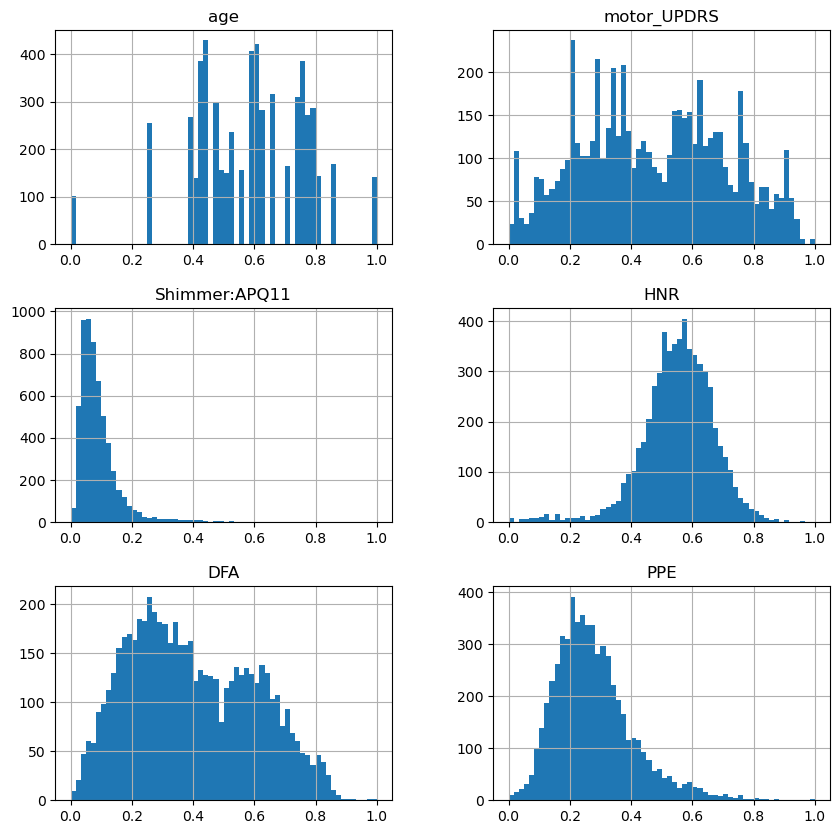

In [86]:
df_prepared_transformed.hist(bins=60, figsize=(10,10))

Полученные данные ограничены диапазоном принимаемых значений [0, 1], сохраняя свое исходное распределение.

## Разделение данных на обучающие, валидационные и тестовые наборы

In [ ]:
def get_x_y(df, target_name="motor_UPDRS"):
    X = df.drop(columns=[target_name])
    Y = df[target_name]
    
    return X, Y

initial_X, initial_Y = get_x_y(df_initial) # разделяем исходные данные на признаки и целевой признак
initial_X_t, initial_Y_t = get_x_y(df_initial_transformed)

prepared_X, prepared_Y = get_x_y(df_prepared)
prepared_X_t, prepared_Y_t = get_x_y(df_prepared_transformed)

Выделение тестовой выборки

In [ ]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.25 # Доля данных, выделяемых под тестовую выборку (25%)
SEED = 42 # Фиксируем генератор случайных чисел для воспроизводимости разбиения
SHUFFLE = True # Указываем, что данные необходимо перемешивать перед разбиением

def split(x, y, test_size=TEST_SIZE, seed=SEED, shuffle=SHUFFLE):
     # разбиение данных на обучающую и тестовую выборки с указанными параметрами
    return train_test_split(x, y, test_size=test_size, random_state=seed, shuffle=shuffle)

initial_X_train, initial_X_test, initial_Y_train, initial_Y_test = split(initial_X, initial_Y) # Исходные данные (без масштабирования) -> обучающую и тестовую
initial_X_t_train, initial_X_t_test, initial_Y_t_train, initial_Y_t_test = split(initial_X_t, initial_Y_t) # Масштабированные исходные данные -> обучающую и тестовую 
prepared_X_train, prepared_X_test, prepared_Y_train, prepared_Y_test = split(prepared_X, prepared_Y) # Подготовленные данные (без масштабирования) -> обучающую и тестовую выборки
prepared_X_t_train, prepared_X_t_test, prepared_Y_t_train, prepared_Y_t_test = split(prepared_X_t, prepared_Y_t) # Масштабированные подготовленные данные -> обучающую и тестовую выборки

prepared_X_test

,age,Shimmer:APQ11,HNR,DFA,PPE
5366,66,0.027,23.543,0.645,0.144
4326,36,0.017,23.979,0.636,0.233
199,58,0.038,18.384,0.755,0.237
3260,60,0.048,14.349,0.784,0.348
4955,62,0.071,6.092,0.583,0.465
...,...,...,...,...,...
3737,74,0.026,18.368,0.704,0.254
4448,66,0.019,20.180,0.561,0.235
2997,57,0.015,29.752,0.661,0.082
757,63,0.032,23.062,0.619,0.145


Выделение валидационной выборки

In [ ]:
VAL_SIZE = 0.25 # Размер валидационной выборки (25% от обучающих данных)

# Дополнительное разбиение обучающей выборки исходных данных на обучающую и валидационную выборки
initial_X_train, initial_X_val, initial_Y_train, initial_Y_val =\
    split(initial_X_train, initial_Y_train, test_size=VAL_SIZE)

# Дополнительное разбиение обучающей выборки масштабированных исходных данных на обучающую и валидационную выборки
initial_X_t_train, initial_X_t_val, initial_Y_t_train, initial_Y_t_val =\
    split(initial_X_t_train, initial_Y_t_train, test_size=VAL_SIZE)

# Дополнительное разбиение обучающей выборки подготовленных данных на обучающую и валидационную выборки
prepared_X_train, prepared_X_val, prepared_Y_train, prepared_Y_val =\
    split(prepared_X_train, prepared_Y_train, test_size=VAL_SIZE)

# Дополнительное разбиение обучающей выборки масштабированных подготовленных данных на обучающую и валидационную выборки
prepared_X_t_train, prepared_X_t_val, prepared_Y_t_train, prepared_Y_t_val =\
    split(prepared_X_t_train, prepared_Y_t_train, test_size=VAL_SIZE)

prepared_X_t_train # Выводим обучающую выборку масштабированных подготовленных данных для проверки

,age,Shimmer:APQ11,HNR,DFA,PPE
4009,0.857,0.091,0.649,0.294,0.277
5825,0.510,0.056,0.607,0.219,0.184
1053,0.755,0.081,0.535,0.449,0.286
3520,0.265,0.049,0.620,0.520,0.233
5815,0.510,0.038,0.619,0.236,0.124
...,...,...,...,...,...
4227,0.796,0.145,0.515,0.816,0.467
1859,0.449,0.045,0.635,0.424,0.193
2667,0.388,0.078,0.571,0.501,0.380
928,0.735,0.097,0.584,0.219,0.201


In [ ]:
prepared_Y_val # Выводим валидационную выборку целевой переменной масштабированных подготовленных данных для проверки

1208    17.000
2451     5.837
269     17.941
4826    34.509
5129    18.948
         ...  
5758    23.339
1635    13.512
3840    29.038
3852    31.699
4600    22.157
Name: motor_UPDRS, Length: 1102, dtype: float64

In [91]:
print(f'initial: train - {initial_X_train.shape}, validation - {initial_X_val.shape}, test - {initial_X_test.shape}')
print(f'prepared: train - {prepared_X_train.shape}, validation - {prepared_X_val.shape}, test - {prepared_X_test.shape}')

initial: train - (3304, 18), validation - (1102, 18), test - (1469, 18)
,prepared: train - (3304, 5), validation - (1102, 5), test - (1469, 5)


## Построение полносвязной нейросетевой регрессионной модели

In [ ]:
from tensorflow import keras

LEARNING_RATE = 0.01 # скорость обучения
BATCH_SIZE = 16 # кол-во образцов, обрабатываемых за одну итерацию
EPOCHS = 30 # кол-во полных проходов по всему обучающему набору данных

def get_ffnn_model():
    model = keras.Sequential() # Создаем последовательную модель, в которой слои добавляются один за другим
    model.add(keras.layers.Dense(32, activation="sigmoid", use_bias=True)) # Добавляем первый полносвязный слой с 32 нейронами и сигмоидальной активацией
    model.add(keras.layers.Dense(32, activation="sigmoid", use_bias=True))
    model.add(keras.layers.Dense(16, activation="sigmoid", use_bias=True))
    model.add(keras.layers.Dense(1, activation="linear", use_bias=True)) # Добавляем выходной слой с 1 нейроном и линейной активацией
    return model

def compile_model(model):
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), # Компилируем модель с оптимизатором Adam
        loss="mse", # Задаем функцию потерь: среднеквадратичная ошибка
        metrics=[keras.metrics.RootMeanSquaredError(), keras.metrics.R2Score()], # Указываем метрики: RMSE и R², для оценки качества модели
    )

def fit_model(model, x, y, x_val, y_val, batch_size=BATCH_SIZE, epochs=EPOCHS):
    history = model.fit(
        x,
        y,
        batch_size=batch_size, # Размер батча, определяющий количество образцов за одну итерацию
        epochs=epochs,
        validation_data=(x_val, y_val),
        verbose=1, # Уровень детализации вывода процесса обучения; значение 1 означает отображение прогресса обучения.
    )

    print("Learning results:")
    keys = history.history.keys()
    for key in keys:
        print(f"\t{key}: {history.history[key][-1]}")
        

*Полносвязная модель на исходных данных:*

In [93]:
model_init = get_ffnn_model()
compile_model(model_init)
fit_model(model_init, initial_X_train, initial_Y_train, initial_X_val, initial_Y_val)

Epoch 1/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 290.9299 - r2_score: -3.4442 - root_mean_squared_error: 16.8972 - val_loss: 71.7437 - val_r2_score: -0.0488 - val_root_mean_squared_error: 8.4702
,Epoch 2/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68.6656 - r2_score: -0.0209 - root_mean_squared_error: 8.2841 - val_loss: 68.4112 - val_r2_score: -9.3102e-05 - val_root_mean_squared_error: 8.2711
,Epoch 3/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65.0120 - r2_score: -0.0020 - root_mean_squared_error: 8.0616 - val_loss: 68.4681 - val_r2_score: -9.2411e-04 - val_root_mean_squared_error: 8.2745
,Epoch 4/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.9326 - r2_score: -0.0016 - root_mean_squared_error: 8.0575 - val_loss: 68.5937 - val_r2_score: -0.0028 - val_root_mean_squared_error: 8.2821
,Epoch 5/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65.3210 - r2_score: -0.0024 - root_mean_squared_error: 8.0813 - val_loss: 68.4049 - val_r2_score: -1.1921

*Полносвязная модель на преобразованных исходных данных:*

In [94]:
model_init_t = get_ffnn_model()
compile_model(model_init_t)
fit_model(model_init_t, initial_X_t_train, initial_Y_t_train, initial_X_t_val, initial_Y_t_val)

Epoch 1/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0590 - r2_score: -0.0545 - root_mean_squared_error: 0.2428 - val_loss: 0.0493 - val_r2_score: 0.1433 - val_root_mean_squared_error: 0.2221
,Epoch 2/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0500 - r2_score: 0.0947 - root_mean_squared_error: 0.2235 - val_loss: 0.0450 - val_r2_score: 0.2191 - val_root_mean_squared_error: 0.2120
,Epoch 3/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0453 - r2_score: 0.1773 - root_mean_squared_error: 0.2127 - val_loss: 0.0440 - val_r2_score: 0.2357 - val_root_mean_squared_error: 0.2097
,Epoch 4/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0462 - r2_score: 0.1720 - root_mean_squared_error: 0.2149 - val_loss: 0.0435 - val_r2_score: 0.2439 - val_root_mean_squared_error: 0.2086
,Epoch 5/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0464 - r2_score: 0.1536 - root_mean_squared_error: 0.2155 - val_loss: 0.0423 - val_r2_score: 0.2651 - val_root_mean_squared_erro

*Полносвязная модель на подготовленных данных:*

In [95]:
model_prepared = get_ffnn_model()
compile_model(model_prepared)
fit_model(model_prepared, prepared_X_train, prepared_Y_train, prepared_X_val, prepared_Y_val)

Epoch 1/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 237.9267 - r2_score: -2.6450 - root_mean_squared_error: 15.2130 - val_loss: 68.8131 - val_r2_score: -0.0060 - val_root_mean_squared_error: 8.2954
,Epoch 2/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.9878 - r2_score: -0.0057 - root_mean_squared_error: 8.0598 - val_loss: 68.4062 - val_r2_score: -1.9789e-05 - val_root_mean_squared_error: 8.2708
,Epoch 3/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65.5639 - r2_score: -0.0014 - root_mean_squared_error: 8.0967 - val_loss: 68.4218 - val_r2_score: -2.4712e-04 - val_root_mean_squared_error: 8.2717
,Epoch 4/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66.0957 - r2_score: -0.0033 - root_mean_squared_error: 8.1293 - val_loss: 68.4382 - val_r2_score: -4.8757e-04 - val_root_mean_squared_error: 8.2727
,Epoch 5/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66.2578 - r2_score: -0.0069 - root_mean_squared_error: 8.1379 - val_loss: 68.9217 - val_r2_score: -0.

*Полносвязная модель на подготовленных масштабированных данных:*

In [96]:
model_prepared_t = get_ffnn_model()
compile_model(model_prepared_t)
fit_model(model_prepared_t, prepared_X_t_train, prepared_Y_t_train, prepared_X_t_val, prepared_Y_t_val)

Epoch 1/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0701 - r2_score: -0.2675 - root_mean_squared_error: 0.2623 - val_loss: 0.0571 - val_r2_score: 0.0085 - val_root_mean_squared_error: 0.2389
,Epoch 2/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0556 - r2_score: 0.0017 - root_mean_squared_error: 0.2358 - val_loss: 0.0527 - val_r2_score: 0.0843 - val_root_mean_squared_error: 0.2296
,Epoch 3/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0522 - r2_score: 0.0683 - root_mean_squared_error: 0.2283 - val_loss: 0.0493 - val_r2_score: 0.1439 - val_root_mean_squared_error: 0.2220
,Epoch 4/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0519 - r2_score: 0.0608 - root_mean_squared_error: 0.2278 - val_loss: 0.0488 - val_r2_score: 0.1522 - val_root_mean_squared_error: 0.2209
,Epoch 5/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0507 - r2_score: 0.0990 - root_mean_squared_error: 0.2252 - val_loss: 0.0487 - val_r2_score: 0.1532 - val_root_mean_squared_erro

Итого, лучшей полносвязной моделью оказалась модель, обученная исходных, но преобразованных данных. 

Показатели коэффициента детерминации $R^2$ на валидационной выборке ближе всех к 1, RMSE и значение функции потерь на порядок меньше аналогичных показателей других моделей.

# Создание двунаправленной рекуррентной нейронной сети с блоком GRU

Для использования рекуррентных сетей следует развернуть двумерные данные в трехмерные:

In [ ]:
def reshape_to_3d(df):
    tensor = np.array(df) # Преобразуем DataFrame в numpy массив, чтобы затем можно было изменить форму данных.
    return tensor.reshape(tensor.shape[0], 1, tensor.shape[1]) # количество образцов, размер временной последовательности, количество признаков 

rnn_initial_X = reshape_to_3d(initial_X)
rnn_initial_X_t = reshape_to_3d(initial_X_t)
rnn_prepared_X = reshape_to_3d(prepared_X)
rnn_prepared_X_t = reshape_to_3d(prepared_X_t)

print(f"initial: {rnn_initial_X.shape}")
print(f"initial transformed: {rnn_initial_X_t.shape}")
print(f"prepared: {rnn_prepared_X.shape}")
print(f"prepared transformed: {rnn_prepared_X_t.shape}")

initial: (5875, 1, 18)
,initial transformed: (5875, 1, 18)
,prepared: (5875, 1, 5)
,prepared transformed: (5875, 1, 5)


Разделим данные на тестовую, валидационную и тренировочную выборки

In [99]:
rnn_initial_X_train, rnn_initial_X_test, rnn_initial_Y_train, rnn_initial_Y_test = split(rnn_initial_X, initial_Y)
rnn_initial_X_t_train, rnn_initial_X_t_test, rnn_initial_Y_t_train, rnn_initial_Y_t_test = split(rnn_initial_X_t, initial_Y_t)
rnn_prepared_X_train, rnn_prepared_X_test, rnn_prepared_Y_train, rnn_prepared_Y_test = split(rnn_prepared_X, prepared_Y)
rnn_prepared_X_t_train, rnn_prepared_X_t_test, rnn_prepared_Y_t_train, rnn_prepared_Y_t_test = split(rnn_prepared_X_t, prepared_Y_t)

rnn_initial_X_train, rnn_initial_X_val, rnn_initial_Y_train, rnn_initial_Y_val =\
    split(rnn_initial_X_train, rnn_initial_Y_train, test_size=VAL_SIZE)

rnn_initial_X_t_train, rnn_initial_X_t_val, rnn_initial_Y_t_train, rnn_initial_Y_t_val =\
    split(rnn_initial_X_t_train, rnn_initial_Y_t_train, test_size=VAL_SIZE)

rnn_prepared_X_train, rnn_prepared_X_val, rnn_prepared_Y_train, rnn_prepared_Y_val =\
    split(rnn_prepared_X_train, rnn_prepared_Y_train, test_size=VAL_SIZE)

rnn_prepared_X_t_train, rnn_prepared_X_t_val, rnn_prepared_Y_t_train, rnn_prepared_Y_t_val =\
    split(rnn_prepared_X_t_train, rnn_prepared_Y_t_train, test_size=VAL_SIZE)

### Сформируем двунаправленную рекуррентную нейронную сеть

In [ ]:
def get_rnn_model():
    model = keras.Sequential() # Создаем последовательную модель Keras для рекуррентной нейронной сети.
    model.add(keras.layers.Bidirectional(keras.layers.GRU(16)))  # Добавляем двунаправленный рекуррентный слой с блоком GRU, содержащий 16 нейронов.
    model.add(keras.layers.Dense(1, activation="linear", name="output"))  # Добавляем выходной полносвязный слой с 1 нейроном и линейной активацией
    return model

Обучние на исходных данных

In [101]:
model_rnn_i = get_rnn_model()
compile_model(model_rnn_i)
fit_model(model_rnn_i, rnn_initial_X_train, rnn_initial_Y_train, rnn_initial_X_val, rnn_initial_Y_val)

Epoch 1/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 203.1962 - r2_score: -2.0514 - root_mean_squared_error: 13.9275 - val_loss: 68.4050 - val_r2_score: -2.6226e-06 - val_root_mean_squared_error: 8.2707
,Epoch 2/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 65.3176 - r2_score: -0.0023 - root_mean_squared_error: 8.0813 - val_loss: 68.5113 - val_r2_score: -0.0016 - val_root_mean_squared_error: 8.2772
,Epoch 3/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 64.8530 - r2_score: -0.0036 - root_mean_squared_error: 8.0507 - val_loss: 69.1056 - val_r2_score: -0.0102 - val_root_mean_squared_error: 8.3130
,Epoch 4/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 67.0576 - r2_score: -0.0026 - root_mean_squared_error: 8.1883 - val_loss: 68.9031 - val_r2_score: -0.0073 - val_root_mean_squared_error: 8.3008
,Epoch 5/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 66.2777 - r2_score: -0.0027 - root_mean_squared_error: 8.1405 - val_loss: 68.4251 - val_r2_score: -2.9635e-04

Обучение на преобразованных исходных данных

In [102]:
model_rnn_i_t = get_rnn_model()
compile_model(model_rnn_i_t)
fit_model(model_rnn_i_t, rnn_initial_X_t_train, rnn_initial_Y_t_train, rnn_initial_X_t_val, rnn_initial_Y_t_val)

Epoch 1/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0577 - r2_score: -0.0906 - root_mean_squared_error: 0.2388 - val_loss: 0.0452 - val_r2_score: 0.2145 - val_root_mean_squared_error: 0.2126
,Epoch 2/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0448 - r2_score: 0.1739 - root_mean_squared_error: 0.2115 - val_loss: 0.0368 - val_r2_score: 0.3613 - val_root_mean_squared_error: 0.1917
,Epoch 3/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0378 - r2_score: 0.3292 - root_mean_squared_error: 0.1945 - val_loss: 0.0386 - val_r2_score: 0.3294 - val_root_mean_squared_error: 0.1965
,Epoch 4/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0349 - r2_score: 0.3769 - root_mean_squared_error: 0.1868 - val_loss: 0.0335 - val_r2_score: 0.4179 - val_root_mean_squared_error: 0.1831
,Epoch 5/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0337 - r2_score: 0.3855 - root_mean_squared_error: 0.1836 - val_loss: 0.0312 - val_r2_score: 0.4578 - val_root_mean_squared_erro

Выполним обучение на подготовленных данных

In [103]:
model_rnn_prepared = get_rnn_model()
compile_model(model_rnn_prepared)
fit_model(model_rnn_prepared, rnn_prepared_X_train, rnn_prepared_Y_train, rnn_prepared_X_val, rnn_prepared_Y_val)

Epoch 1/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 235.6656 - r2_score: -2.8170 - root_mean_squared_error: 14.9573 - val_loss: 63.9677 - val_r2_score: 0.0649 - val_root_mean_squared_error: 7.9980
,Epoch 2/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 61.2418 - r2_score: 0.0594 - root_mean_squared_error: 7.8243 - val_loss: 62.6489 - val_r2_score: 0.0841 - val_root_mean_squared_error: 7.9151
,Epoch 3/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 62.4997 - r2_score: 0.0604 - root_mean_squared_error: 7.9042 - val_loss: 62.2579 - val_r2_score: 0.0899 - val_root_mean_squared_error: 7.8904
,Epoch 4/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 62.5807 - r2_score: 0.0567 - root_mean_squared_error: 7.9102 - val_loss: 65.1875 - val_r2_score: 0.0470 - val_root_mean_squared_error: 8.0739
,Epoch 5/30
,207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 59.9252 - r2_score: 0.0576 - root_mean_squared_error: 7.7398 - val_loss: 62.1295 - val_r2_score: 0.0917 - val_root_mean

Выполним обучение на подготовленных преобразованных данных

In [232]:
model_rnn_prepared_t = get_rnn_model()
compile_model(model_rnn_prepared_t)
fit_model(model_rnn_prepared_t, rnn_prepared_X_t_train, rnn_prepared_Y_t_train, rnn_prepared_X_t_val, rnn_prepared_Y_t_val)

Epoch 1/10
,43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.8809 - r2_score: 0.0709 - root_mean_squared_error: 0.9374 - val_loss: 0.6967 - val_r2_score: 0.3318 - val_root_mean_squared_error: 0.8347
,Epoch 2/10
,43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6803 - r2_score: 0.2890 - root_mean_squared_error: 0.8243 - val_loss: 0.5143 - val_r2_score: 0.5067 - val_root_mean_squared_error: 0.7172
,Epoch 3/10
,43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4828 - r2_score: 0.5189 - root_mean_squared_error: 0.6946 - val_loss: 0.4733 - val_r2_score: 0.5460 - val_root_mean_squared_error: 0.6880
,Epoch 4/10
,43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3971 - r2_score: 0.5902 - root_mean_squared_error: 0.6301 - val_loss: 0.3891 - val_r2_score: 0.6268 - val_root_mean_squared_error: 0.6238
,Epoch 5/10
,43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3834 - r2_score: 0.6234 - root_mean_squared_error: 0.6187 - val_loss: 0.3380 - val_r2_score: 0.6758 - val_root_mean_squared_error: 0.5814


Значения метрик для рекуррентных моделей, оказались немного хуже, чем у аналогичных им полносвязных моделей.

$R^2$ немного снизился, ошибка возросла как для валидационной, так и для тренировочной подвыборок.

### Таким образом, лучшей моделью стала модель полносвязной нейронной сети, обученная на исходных преобразованных данных
Оценка модели на тестовых данных

In [104]:
result = model_init_t.evaluate(
    initial_X_t_test,
    initial_Y_t_test,
    batch_size=BATCH_SIZE)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0106 - r2_score: 0.7977 - root_mean_squared_error: 0.1028


### GridSearch для лучшей модели

In [ ]:
from itertools import product
from sklearn.metrics import mean_squared_error, r2_score

def build_model(num_layers, num_neurons, activation='sigmoid'):
    model = keras.Sequential()

    # Добавляем заданное число полносвязных слоев с указанным количеством нейронов и функцией активации
    for _ in range(num_layers):
        model.add(keras.layers.Dense(num_neurons, activation=activation, use_bias=True))

    # Добавляем выходной слой с одним нейроном и линейной активацией
    model.add(keras.layers.Dense(1, activation="linear", use_bias=True))

    # Компилируем модель, используя оптимизатор 'adam' и функцию потерь MSE (среднеквадратичная ошибка)
    model.compile(optimizer='adam', loss='mse')

    return model

# Params to optimize
param_grid = {
    'num_layers': [2, 3], # Возможное число скрытых слоев
    'num_neurons': [32, 64], # Возможное число нейронов в каждом скрытом слое
    'activation': ['relu', 'sigmoid'], # Возможные функции активации для скрытых слоев
    'batch_size': [16, 32], 
    'epochs': [20] # Число эпох для обучения 
}

# Перебираем все комбинации гиперпараметров с помощью product
for num_layers, num_neurons, activation, batch_size, epochs in product(*param_grid.values()): # Перебираются все возможные комбинации параметров из param_grid
    model = build_model(num_layers, num_neurons, activation) # Создаем модель с текущей комбинацией гиперпараметров

    # Обучаем модель на тренировочных данных (масштабированные исходные данные)
    model.fit(initial_X_t_train, initial_Y_t_train, epochs=epochs, batch_size=batch_size, 
              verbose=0, validation_data=(initial_X_t_val, initial_Y_t_val))
    
    y_val_pred = model.predict(initial_X_t_val)  # Предсказываем значения на валидационной выборке
    mse = mean_squared_error(initial_Y_t_val, y_val_pred) # Вычисляем среднеквадратичную ошибку (MSE) 
    r2 = r2_score(initial_Y_t_val, y_val_pred) # коэффициент детерминации (R²) для валидации
    
    print(f"Testing: layers={num_layers}, neurons={num_neurons}, activation={activation}, batch_size={batch_size};\n",
          f"\tR2 = {r2}, RMSE = {np.sqrt(mse)}\n")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
,Testing: layers=2, neurons=32, activation=relu, batch_size=16;
, 	R2 = 0.8026564609617141, RMSE = 0.10657916521090915
,
,35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
,Testing: layers=2, neurons=32, activation=relu, batch_size=32;
, 	R2 = 0.770370182032176, RMSE = 0.11496747651404844
,
,35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
,Testing: layers=2, neurons=32, activation=sigmoid, batch_size=16;
, 	R2 = 0.21584733671954026, RMSE = 0.21245216886205445
,
,35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
,Testing: layers=2, neurons=32, activation=sigmoid, batch_size=32;
, 	R2 = 0.20578320511952952, RMSE = 0.2138111706878059
,
,35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
,Testing: layers=2, neurons=64, activation=relu, batch_size=16;
, 	R2 = 0.8534666529708657, RMSE = 0.0918394116683663
,
,35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
,Testing: layers=2, neurons=64, activation=relu, batch_size=32;
, 	R2 = 0.8297092253707832, RMSE = 0.09900483826387611
,
,35/35 ━━━━━━━━━━━━━━━━━━━━ 0s

Лучшей моделью в результате GridSearch оказалась модель с параметрами:
- три слоя по 64 нейрона, один слой с одним нейроном (выходной)
- функция активации - ReLU
- размер батча - 16

In [ ]:
EPOCHS = 40 # Обновляем число эпох для финального обучения лучшей модели

best_model = build_model(3, 64, 'relu') # Создаем лучшую модель с выбранными гиперпараметрами (3 слоя, 64 нейрона, функция активации 'relu')
compile_model(best_model) # Компилируем лучшую модель с оптимизатором Adam, MSE, RMSE и R² как метриками

# Обучаем лучшую модель на тренировочных данных с валидацией, используя 40 эпох и batch_size=16
fit_model(best_model, initial_X_t_train, initial_Y_t_train, initial_X_t_val, initial_Y_t_val, epochs=EPOCHS, batch_size=16)

Epoch 1/40
,207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0565 - r2_score: -0.0155 - root_mean_squared_error: 0.2352 - val_loss: 0.0359 - val_r2_score: 0.3758 - val_root_mean_squared_error: 0.1895
,Epoch 2/40
,207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0328 - r2_score: 0.4100 - root_mean_squared_error: 0.1808 - val_loss: 0.0316 - val_r2_score: 0.4519 - val_root_mean_squared_error: 0.1776
,Epoch 3/40
,207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0258 - r2_score: 0.5353 - root_mean_squared_error: 0.1603 - val_loss: 0.0162 - val_r2_score: 0.7190 - val_root_mean_squared_error: 0.1272
,Epoch 4/40
,207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191 - r2_score: 0.6534 - root_mean_squared_error: 0.1382 - val_loss: 0.0189 - val_r2_score: 0.6713 - val_root_mean_squared_error: 0.1376
,Epoch 5/40
,207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0167 - r2_score: 0.6927 - root_mean_squared_error: 0.1292 - val_loss: 0.0172 - val_r2_score: 0.7015 - val_root_mean_squared_erro

In [108]:
best_model.evaluate(
    initial_X_t_test,
    initial_Y_t_test,
    batch_size=16)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076 - r2_score: 0.8546 - root_mean_squared_error: 0.0872


[0.008185770362615585, 0.09047524631023407, 0.8495804071426392]

### Показатели метрик немного улучшились на тестовых данных

Таким образом, лучшей моделью стала полносвязная модель, обученная на исходных масштабированных данных.

Результат был немного улучшен с помощью GridSearch, лучшая архитектура сети - 3 слоя по 64 нейрона, выходной слой с одним нейроном, функции активации - ReLU.

Лучший результат метрики $R^2$ составил 0,85 для тестовых данных, что является неплохим результатом.

Лучшее значения для RMSE - 0,08 для тестовых данных.